Step 1: Install Libraries & Upload Dataset

In [16]:
# 🔹 Step 1: Install & Import
!pip install nltk scikit-learn seaborn --quiet

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Fix path error
nltk.data.path.clear()
nltk.data.path.append("/root/nltk_data") # Explicitly set the data path
nltk.download('punkt', force=True)
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
from google.colab import files
uploaded = files.upload()


Saving Tweets.csv to Tweets (1).csv


Step 2: Load and Explore the Dataset

In [9]:
# Load dataset
df = pd.read_csv("Tweets.csv")
df = df[['text', 'airline_sentiment']]  # keep only necessary columns
df.head()


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


STEP 3: TEXT PRE-PROCESSING

In [17]:
# 🔹 Step 4: Preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|[^a-zA-Z\s]", "", text)
    tokens = [lemmatizer.lemmatize(word) for word in word_tokenize(text) if word not in stop_words]
    return " ".join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess)
df[['text', 'cleaned_text']].head()

,text,cleaned_text
0,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said
1,@VirginAmerica plus you've added commercials t...,virginamerica plus youve added commercial expe...
2,@VirginAmerica I didn't today... Must mean I n...,virginamerica didnt today must mean need take ...
3,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...
4,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing


Step 5: Vectorization + Target


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert cleaned text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text']).toarray()
y = df['airline_sentiment']  # target variable (positive / negative / neutral)



Step 6: Split Dataset

In [19]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 7: Train Model (Naive Bayes)

In [20]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)



 Step 8: Evaluate Model



✅ Accuracy: 0.7380464480874317

Classification Report:
               precision    recall  f1-score   support

    negative       0.73      0.98      0.84      1889
     neutral       0.72      0.24      0.36       580
    positive       0.87      0.36      0.51       459

    accuracy                           0.74      2928
   macro avg       0.77      0.53      0.57      2928
weighted avg       0.75      0.74      0.69      2928



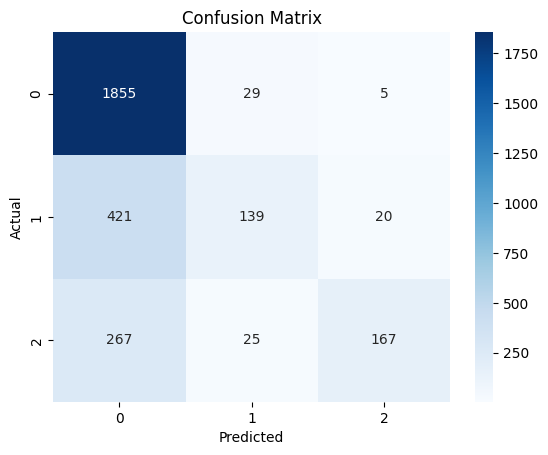

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# Detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


 Step 9: Save Predictions

In [22]:
# Add predictions to DataFrame
df['predicted'] = model.predict(vectorizer.transform(df['cleaned_text']).toarray())

# Save to CSV
df.to_csv("sentiment_predictions.csv", index=False)

# Download in Colab
from google.colab import files
files.download("sentiment_predictions.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>